In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### Another Approach to Regression

We can use the Nearest Neighbors approach to consider our earlier problem involving finding the line of best fit for the `mtcars` dataset.  Now, we want to assign $y$-values based on the nearest $k$ neighbors.  Plotting the result of two iterations with different values for $k$ surfaces important considerations.

In [2]:
mtcars = pd.read_csv('data/mtcars.csv')

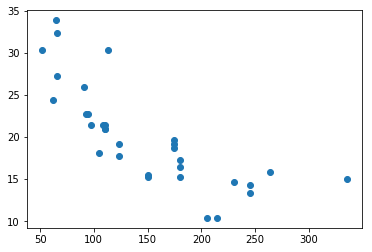

In [3]:
plt.scatter(mtcars['hp'], mtcars['mpg'])

In [4]:
from sklearn.neighbors import KNeighborsRegressor

In [5]:
X = mtcars['hp'].values.reshape(-1,1)
y = mtcars['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
regress = KNeighborsRegressor(n_neighbors=5)
regress2 = KNeighborsRegressor(n_neighbors=20)

In [7]:
regress.fit(X_train, y_train)
regress2.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=20, p=2,
          weights='uniform')

In [8]:
pred_5 = regress.predict(X_test)
pred_20 = regress2.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
print('Error with 5 is', np.sqrt(mean_squared_error(pred_5, y_test)), 'and 20 is', np.sqrt(mean_squared_error(pred_20, y_test)))

Error with 5 is 2.0476938247697096 and 20 is 4.688048967854326


In [11]:
x = mtcars.sort_values('hp')
y2 = regress.predict(x['hp'].values.reshape(-1,1))
y3 = regress2.predict(x['hp'].values.reshape(-1,1))

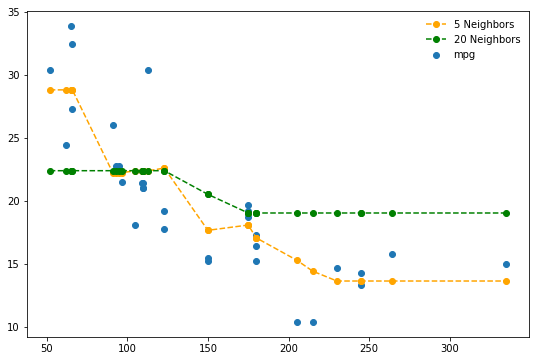

In [12]:
plt.figure(figsize = (9, 6))
plt.scatter(mtcars['hp'], mtcars['mpg']);
plt.plot(x['hp'], y2, '--o', color = 'orange', label = '5 Neighbors');
plt.plot(x['hp'], y3, '--o', color = 'green', label = '20 Neighbors');
plt.legend(frameon = False)

In [13]:
from sklearn.grid_search import GridSearchCV

/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [14]:
params = {'n_neighbors': [i for i in range(3, 14)]}

In [15]:
grid = GridSearchCV(KNeighborsRegressor(), param_grid=params, scoring = 'mean_squared_error')

In [16]:
grid.fit(X_train, y_train)

/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sampl

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [17]:
grid.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=6, p=2,
          weights='uniform')

In [18]:
best = grid.best_estimator_

In [19]:
best.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=6, p=2,
          weights='uniform')

In [20]:
pred = best.predict(X_test)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [23]:
print("With KNNeighbors: {:.2f}".format(np.sqrt(mean_squared_error(pred, y_test))), "\nLinear Regression with OLS: {:.2f}".format(np.sqrt(mean_squared_error(pred_lr, y_test))))

With KNNeighbors: 1.89 
Linear Regression with OLS: 4.37


In [24]:
from sklearn.datasets import load_iris

In [25]:
iris = load_iris()

In [26]:
print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [27]:
X = iris.data
y = iris.target
y[::10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [31]:
pred

array([1, 1, 2, 0, 1, 1, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 0,
       0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1])

In [32]:
y_test

array([1, 1, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 0,
       0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2])

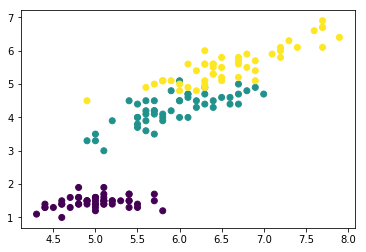

In [33]:
plt.scatter(X[:,0], X[:,2], c = y)

In [34]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, pred)

0.8947368421052632